In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
#print(iris.DESCR)

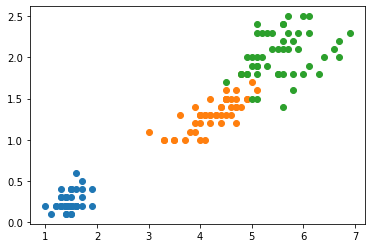

In [3]:
plt.scatter(X[y == 0,0],X[y==0,1])
plt.scatter(X[y == 1,0],X[y==1,1])
plt.scatter(X[y == 2,0],X[y==2,1])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 2, criterion = "entropy")
dt_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [5]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))   
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap)

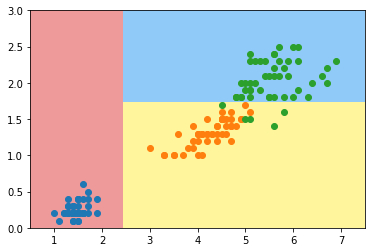

In [6]:
plot_decision_boundary(dt_clf, axis = [0.5, 7.5, 0, 3])
plt.scatter(X[y == 0, 0], X[y==0,1])
plt.scatter(X[y == 1, 0], X[y==1,1])
plt.scatter(X[y == 2, 0], X[y==2,1])
plt.show()

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

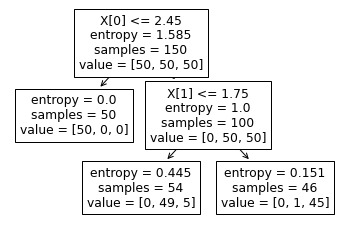

In [7]:
from sklearn import tree
tree.plot_tree(dt_clf)

# Exercise 01:
Decision tree has low bias and high variance. 
## criterion:
measures the quality of a split: "gini":Gini impurity tells what is the probability of misclassifying an observation."entropy" is the information gain which is the reduction in entropy or surprise by transforming a dataset. It is calculated by comparing the entropy of the dataset before and after a transformation.
## splitter:
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. It affects the where it splits and how it splits so affects the bias and variance. 
## max_depth:
The maximum depth of the tree.The bias-variance trade off does depend on the depth of the tree.Higher depth DTs are more prone to overfitting and thus lead to higher variance in the model.
## min_samples_split:
The minimum number of samples required to split an internal node.If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

## min_samples_leaf:
The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

## min_weight_fraction_leaf:
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 

## max_features:
The number of features to consider when looking for the best split. Too many features result in overfitting. If int, then consider max_features features at each split. If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split. If “auto”, then max_features=sqrt(n_features). If “sqrt”, then max_features=sqrt(n_features). If “log2”, then max_features=log2(n_features). If None, then max_features=n_features.

## random_state:
Controls the randomness of the estimator.The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. See Glossary for details.

In [8]:
# Create random dataset
X,y = datasets.make_moons(n_samples = 500, noise = 0.3, random_state = 42)

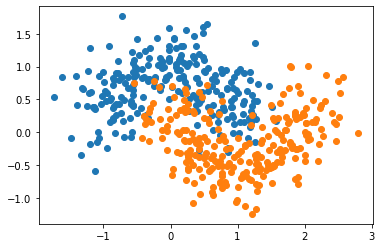

In [9]:
plt.scatter(X[y == 0, 0], X[y==0,1])
plt.scatter(X[y == 1, 0], X[y==1,1])
plt.show()

In [10]:
# Use Random Forest from Bagging view
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators = 300,
                               max_samples = 300,
                               bootstrap = True,
                               oob_score = True)
bagging_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=300, oob_score=True)

In [11]:
bagging_clf.oob_score_

0.908

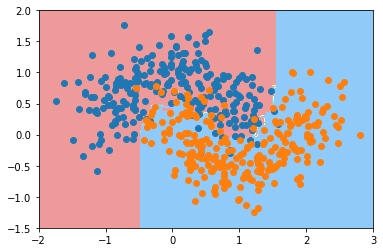

In [12]:
plot_decision_boundary(bagging_clf,axis = [-2, 3, -1.5, 2])
plt.scatter(X[y == 0, 0], X[y==0,1])
plt.scatter(X[y == 1, 0], X[y==1,1])
plt.show()

In [13]:
# Use Random Forest directly
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 300,
                                random_state = 666,
                                oob_score = True
                               )
rf_clf.fit(X,y)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=666)

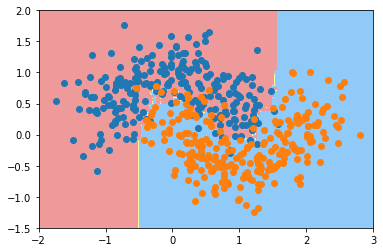

In [14]:
plot_decision_boundary(rf_clf,axis = [-2, 3, -1.5, 2])
plt.scatter(X[y == 0, 0], X[y==0,1])
plt.scatter(X[y == 1, 0], X[y==1,1])
plt.show()

In [15]:
rf_clf.oob_score_

0.896

# Exercise 02:


## 1. BaggingClassifier( ) 
### base_estimator:
The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.

### n_estimators:
The number of base estimators in the ensemble.

### max_samples:
The number of samples to draw from X to train each base estimator (with replacement by default, see bootstrap for more details).

### max_features:
The number of features to draw from X to train each base estimator ( without replacement by default, see bootstrap_features for more details).

### bootstrap:
Whether samples are drawn with replacement. If False, sampling without replacement is performed.

### bootstrap_features:
Whether features are drawn with replacement.

### oob_score:
Whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True.Out of bag (OOB) score is a way of validating the Random forest model.For training, each of the OOB sample rows is passed through every DT that did not contain the OOB sample row in its bootstrap training data and a majority prediction is noted for each row. And the OOB score is computed as the number of correctly predicted rows from the out of bag sample.In cases where we do not have a large dataset and want to consume it all as the training dataset, the OOB score provides a good trade-off. 

### warm_start:
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble. 

### n_jobs:
The number of jobs to run in parallel for both fit and predict. 

### random_state:
Controls the random resampling of the original dataset (sample wise and feature wise). If the base estimator accepts a random_state attribute, a different seed is generated for each instance in the ensemble. Pass an int for reproducible output across multiple function calls. 

## 2. RandomForestClassifier( )

### n_estimators:
The number of trees in the forest.

### criterion:
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 


### max_features:
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

### min_samples_split:
The minimum number of samples required to split an internal node

### random_state:
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). 

### oob_score：
Whether to use out-of-bag samples to estimate the generalization score. 

# Difference:
In sklearn if you bag decision trees, you still end up using all features with each decision tree. In random forests however, you use a subset of features.

## Performance:
From oob_score_ we can see that BaggingClassifier( ) performs better than RandomForestClassifier( ). 

## Comparison:

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [19]:
from mlxtend.evaluate import bias_variance_decomp
# For BaggingClassifier( ) 
mse,bias, var = bias_variance_decomp(bagging_clf, x_train, y_train, x_test, y_test,loss='0-1_loss', num_rounds=10, random_seed=1)
print(bias, var)
# For RandomForestClassifier( ) 
mse2,bias2, var2 = bias_variance_decomp(rf_clf, x_train, y_train, x_test, y_test,loss='0-1_loss', num_rounds=10, random_seed=1)
print(bias2, var2)

0.07 0.049
0.08 0.047


It seems BaggingClassifier( ) has less bias and variance than RandomForestClassifier( )

In [20]:
# different argument values
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators = 400,
                               max_samples = 200,
                               bootstrap = True,
                               oob_score = True)

rf_clf = RandomForestClassifier(n_estimators = 400,
                                random_state = 333,
                                oob_score = True
                               )

In [21]:
from mlxtend.evaluate import bias_variance_decomp
# For BaggingClassifier( ) 
mse,bias, var = bias_variance_decomp(bagging_clf, x_train, y_train, x_test, y_test,loss='0-1_loss', num_rounds=10, random_seed=1)
print(bias, var)
# For RandomForestClassifier( ) 
mse2,bias2, var2 = bias_variance_decomp(rf_clf, x_train, y_train, x_test, y_test,loss='0-1_loss', num_rounds=10, random_seed=1)
print(bias2, var2)

0.05 0.046000000000000006
0.07 0.053


BaggingClassifier( ) has less bias and variance than RandomForestClassifier( )

# Questions:


## (1) 
yes, they can be used for unsupervised clustering and data dimension reduction. In this paper Clustering via decision tree construction, the authors use a novel approach to cluster - which for practical reasons amounts to using decision tree for unsupervised learning.

 They assume all the data they have belongs to a class Y (Fig A below). The goal is to identify those two clusters (black dots) in an unsupervised manner.
 
 Then they assume the data they have is mixed with with another fictitious set of points (hollow dots) that is uniformly distributed. Lets say these points belong to class N.
 
 Then with the fictitious data points added, they run a decision tree algorithm to partition the space as shown in Fig B.
 
 This identifies the two clusters we need as shown in Fig C.
 
 The reason this works is if there are indeed clusters in our original data, it cannot be uniformly distributed. So by adding the fictitious data points, we can identify the true clusters we need because within those clusters the number of Y points will be more than the fictitious points.
 
 The paper addresses additional details like how many points do we add, and how do we just dynamically generate points without actually adding points ( an optimization to reduce computing resources) etc.

## (2)
### Strengths of decision tree:
Decision trees perform classification without requiring much computation.
Decision trees are able to handle both continuous and categorical variables.
Decision trees provide a clear indication of which fields are most important for prediction or classification.
### Strengths of  random forest:
It reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.

It can solve both classification as well as regression problems.

Random Forest can automatically handle missing values.

It can solve both classification as well as regression problems.

Random Forest is usually robust to outliers and can handle them automatically.

No feature scaling required: No feature scaling (standardization and normalization) required in case of Random Forest as it uses rule based approach instead of distance calculation.
## (3)
### Weaknesses of decision tree:
Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.

Decision trees are prone to errors in classification problems with many class and relatively small number of training examples.

### Weaknesses of  random forest:
Complexity: Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources. On the other hand decision tree is simple and does not require so much computational resources.
Longer Training Period: Random Forest require much more time to train as compared to decision trees as it generates a lot of trees (instead of one tree in case of decision tree) and makes decision on the majority of votes.
## (4)
For both classification and regression tasks, the data is categorical variable or continuous variable, and not very complex .